# stability_of_powers

Characterise the stability of the power source (Energetiq EQ-77) and that of the power metres reading its output at various stages of the setup.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# -- FUNCTIONS -- #

#cleans data of NaN values
def clean_nan(np_data):
    
    sec   = np_data['sec']
    power = np_data['power']
    
    #find the indices of NaNs and append to targets array:
    nan_index = np.isnan(power)
    count = 0; targets = []
    for elm in nan_index:
        if elm == True:
            targets.append(count)
        count+=1
    
    
    #use target array to remove those indices from sec array and power array
    sec_i   = np.delete(sec, obj=targets)
    power_i = np.delete(power, obj=targets)
    
    return sec_i, power_i

def plot(np_data, bins=50):
    
    # plot size
    plt.rcParams['figure.figsize'] = 15,10
    
    sec, power = clean_nan(np_data); mean = np.mean(power); std = np.std(power)
    
    fig, (ax1, ax2) = plt.subplots(2, sharex = False, sharey = False)
    
    #plot scatter
    ax1.scatter(sec, power, color='darkred', s = 0.3)
    ax1.grid('on')
    ax1.set_xlabel('Time [sec]'); ax1.set_ylabel('Power [Watts]')
    ax1.set_title('Time series measurement')
    
    #plot hist
    ax2.hist(power, bins=bins, color='darkred', label='Mean: {:.5f}\nStd: {:.2e}'.format(mean, std))
    ax2.set_xlabel('Power [Watts]'); ax2.set_ylabel("Frequency")
    ax2.set_title('Distribution')
    ax2.legend()
    
    fig.suptitle("Energetiq EQ77 Power Stability", fontsize=25)

In [3]:
## -- DATA -- #

#define data paths
path_to_data3cs_repo = '/home/hargy/Documents/3CS/repo_data3cs' # (dependent on where you locally have the data3cs repository saved)

np_path_0            = f'{path_to_data3cs_repo}/data3cs/studies/power_stability_1/coll1/pm_t_(0).npy'
np_path_1            = f'{path_to_data3cs_repo}/data3cs/studies/power_stability_1/coll1/pm_t_(1).npy'

#load numpy arrays from npy file
np_data_0 = np.load(np_path_0)
np_data_1 = np.load(np_path_1)

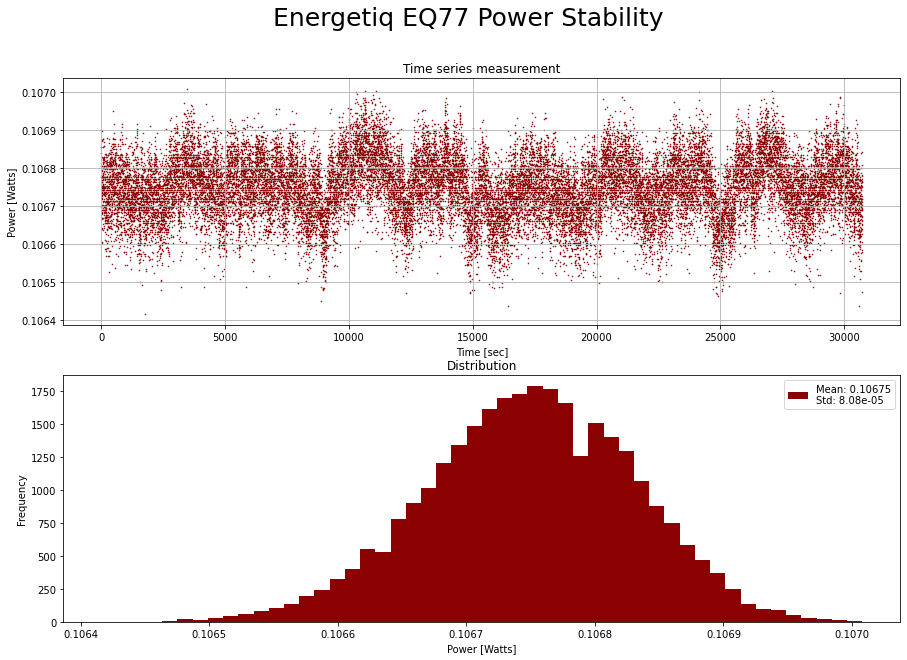

In [19]:
plot(np_data_0, bins=50)

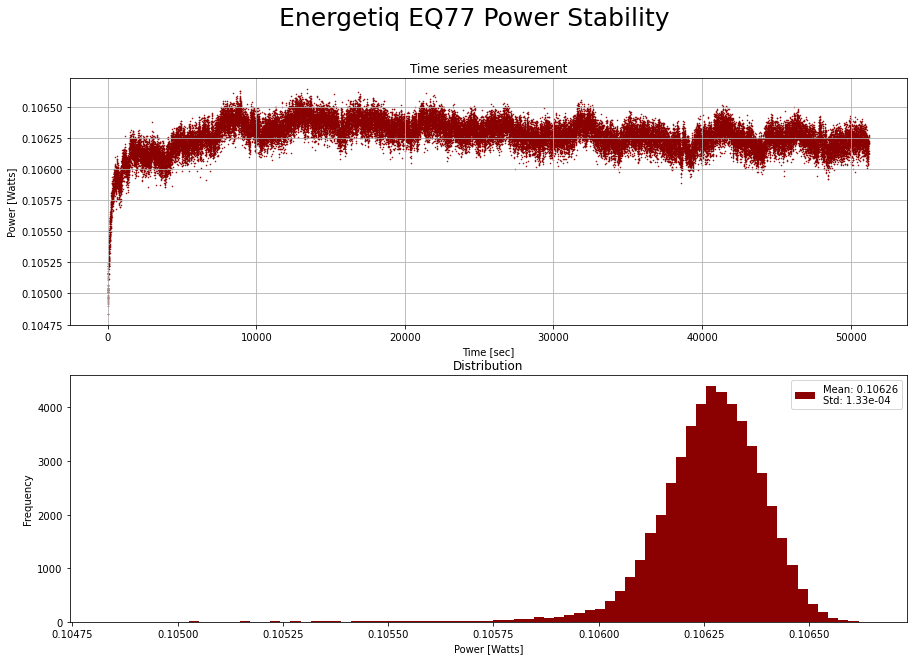

In [20]:
plot(np_data_1,bins=75)